In [1]:
import os,pandas as pd, numpy as np, scipy.stats as sp

In [2]:
source_dir = os.path.join('..','derivatives','all_data')

In [3]:
data = pd.read_csv(os.path.join(source_dir,'subject_level_data.csv'))
data.head()

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,1.0,20.0,2.0,14.0,4,7,0.0,1,9.0,...,87,30.0,16,38,9.0,14.0,11.0,11.0,10.0,15.0
1,102,2.0,19.0,2.0,12.0,3,3,0.0,1,10.0,...,83,26.0,16,39,17.0,13.0,14.0,17.0,15.0,13.0
2,103,3.0,18.0,1.0,12.0,3,0,0.0,1,7.0,...,76,28.0,15,47,16.0,13.0,12.0,16.0,9.0,12.0
3,104,1.0,18.0,1.0,12.0,4,0,0.0,1,9.0,...,97,28.0,16,31,17.0,13.0,12.0,14.0,11.0,11.0
4,105,2.0,18.0,1.0,12.0,6,0,0.0,1,8.0,...,82,28.0,15,46,17.0,9.0,18.0,14.0,12.0,11.0


# Correlations

### Comprehension Change -> everything
#### Pearson r

In [5]:
for c in data.columns:
    try: print(c,
               'r=',sp.pearsonr(data['comp_change'],data[c])[0],
               'p=',sp.pearsonr(data['comp_change'],data[c])[1]
              )
    except TypeError as e: continue

sub r= -0.2102937439346819 p= 0.13455573929937198
Condition r= 0.23288713274112227 p= 0.09661672962621577
Age r= nan p= 1.0
Gender r= -0.0773403942549105 p= 0.585774480121003
EduYears r= -0.2863477698799138 p= 0.03959001290676773
SciEdu_Grad r= nan p= 1.0
AgeGroup r= -0.22930101690913687 p= 0.10200989379241422
comp_t1 r= -0.5091893232464813 p= 0.00011575246637363443
comp_t2 r= 0.47847205938976634 p= 0.00033342067122840794
comp_change r= 1.0 p= 0.0
nb_RT r= nan p= 1.0
nb_CoR r= -0.08340205371537593 p= 0.5566487913763492
procspd_RT r= -0.435056602264881 p= 0.0012678734345126688
NFCS_sum r= 0.012848664824814235 p= 0.9279658500656287
TSSI_sum r= -0.056641886393747946 p= 0.6900097031976473
vocab_sum r= -0.2332808315654283 p= 0.09603838161871499
SciLit_sum r= 0.00230302802684524 p= 0.9870719050939821
SciTude_sum r= -0.0011618312701024936 p= 0.9934778301093331
O1_sum r= -0.1197930656655678 p= 0.3976124011633635
O2_sum r= 0.26451929099847943 p= 0.05809051074374658
O3_sum r= 0.12598566804581962

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


## Age Group comparisons

In [59]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

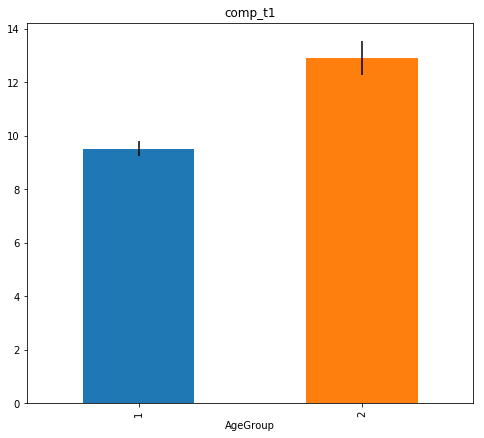

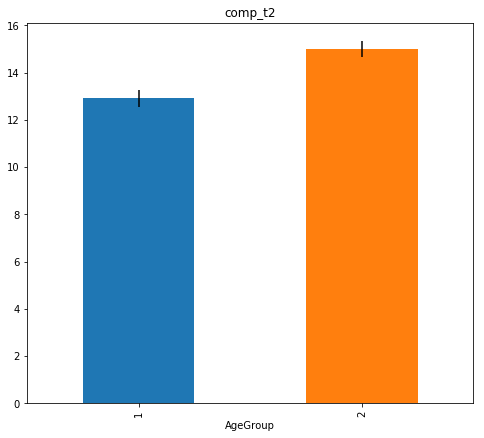

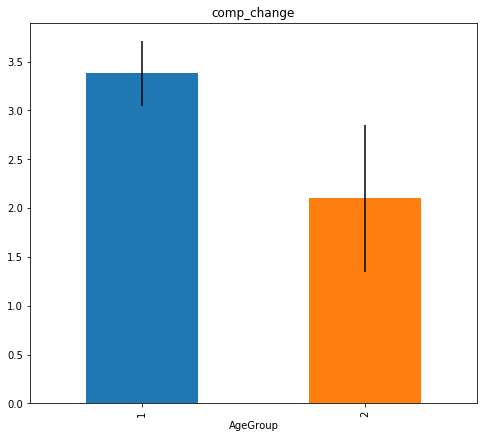

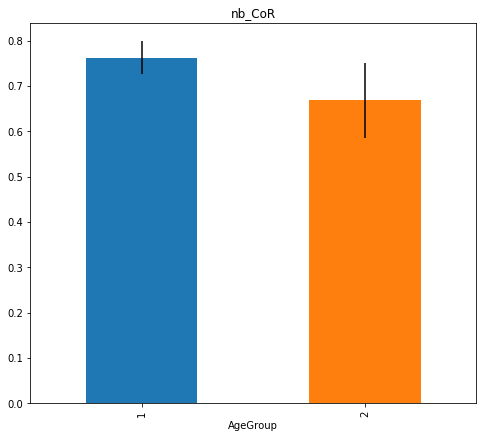

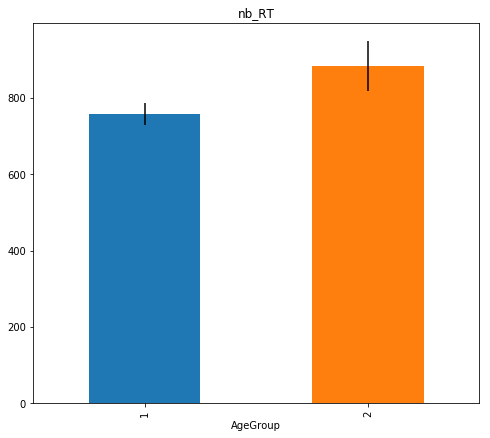

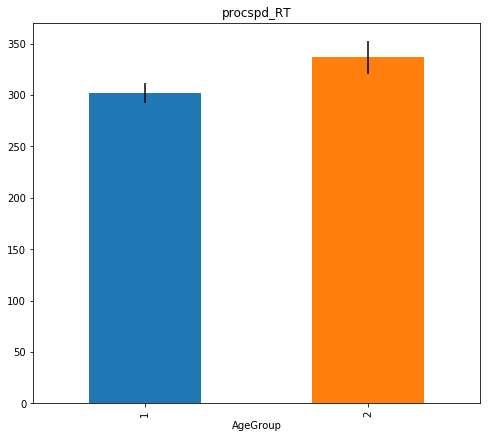

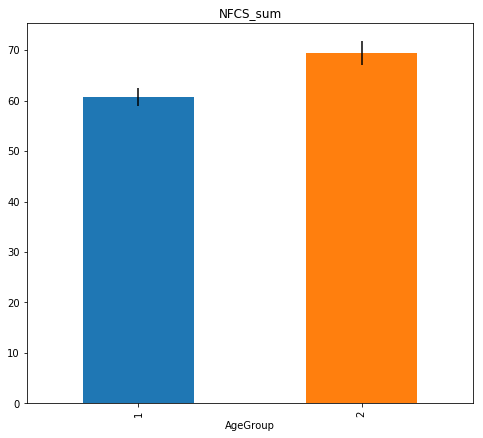

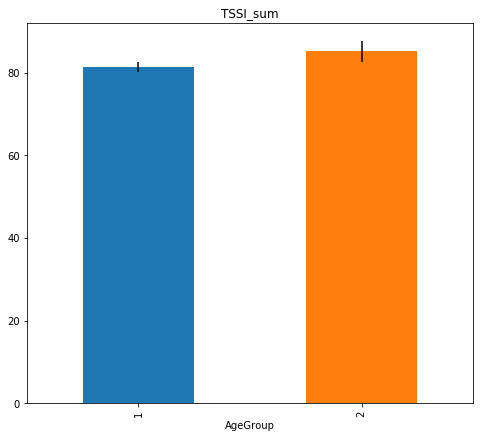

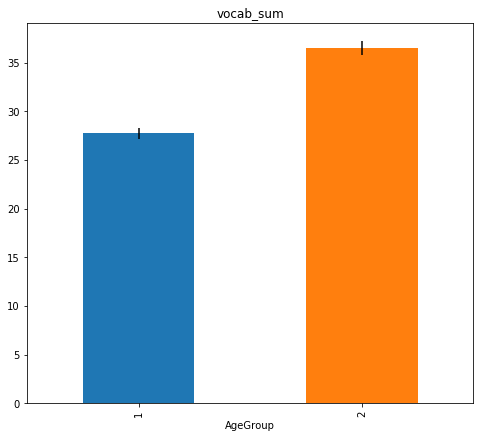

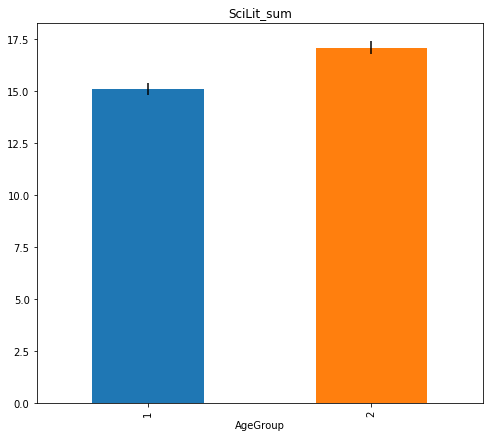

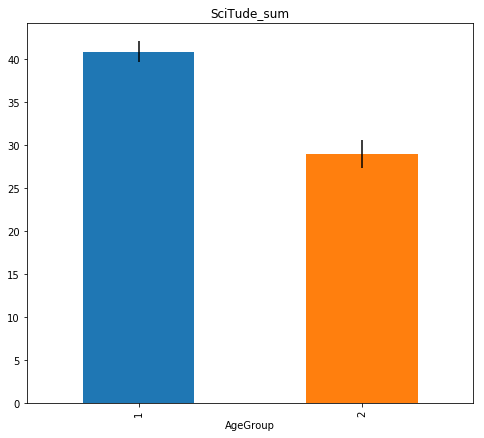

In [63]:
means = data.groupby('AgeGroup').mean()
sem = data.groupby('AgeGroup').sem()
for var in vars_of_interest:
    means.plot(y=var,kind='bar',yerr=sem[var],legend=False,title=var,figsize=(8,7))

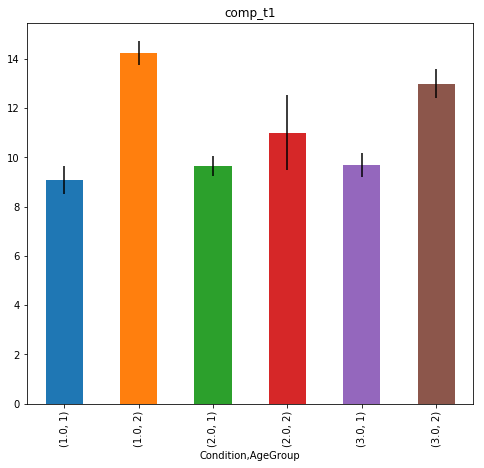

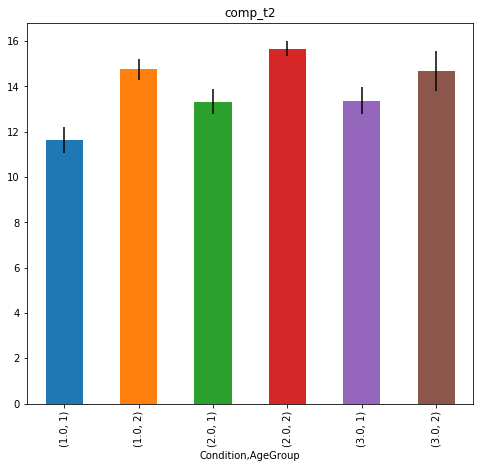

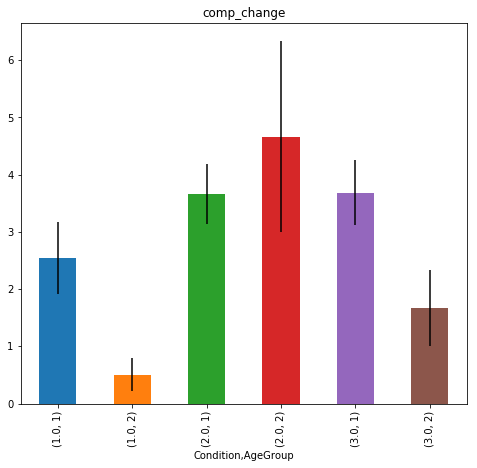

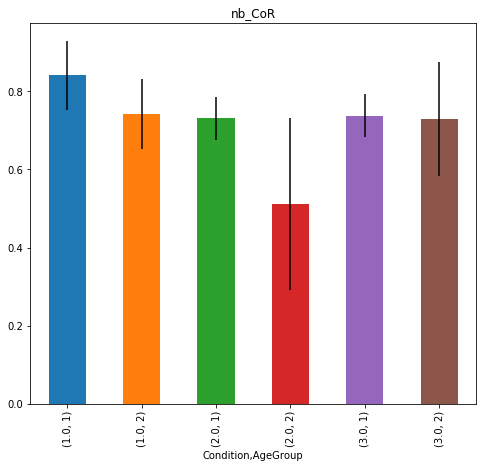

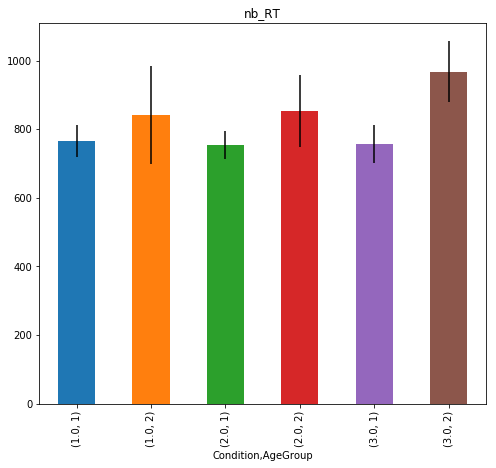

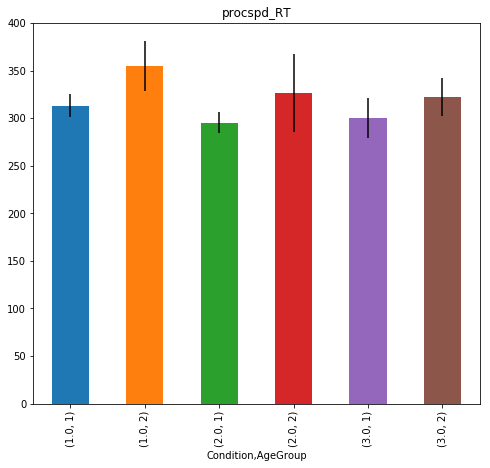

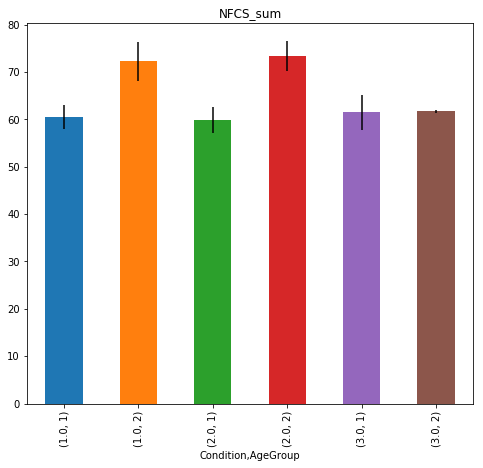

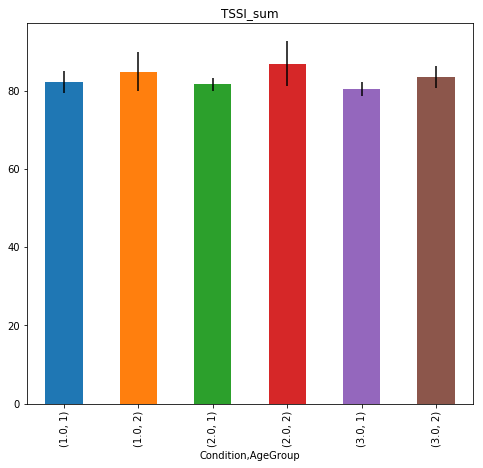

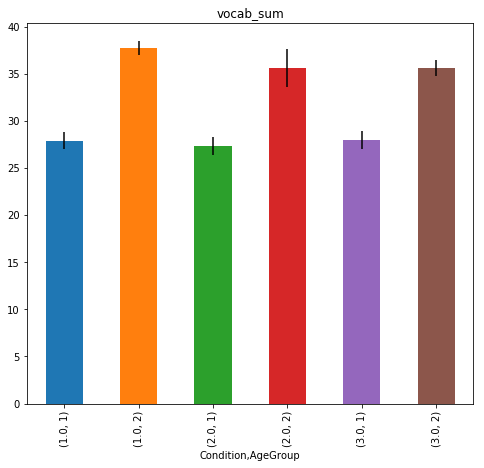

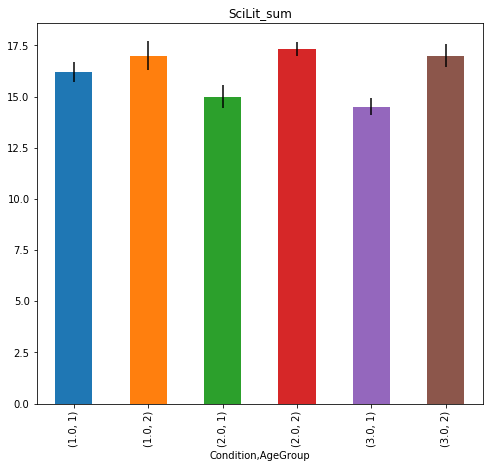

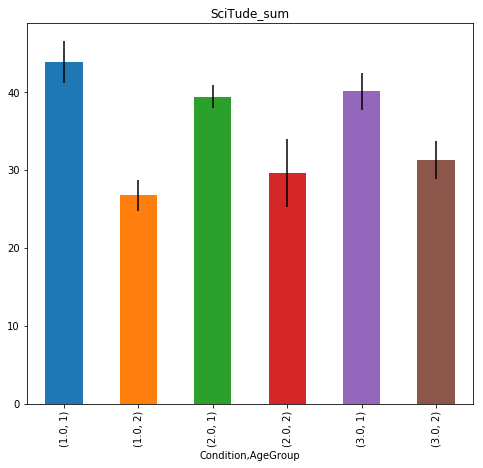

In [64]:
means = data.groupby(['Condition','AgeGroup']).mean()
sem = data.groupby(['Condition','AgeGroup']).sem()
for var in vars_of_interest:
    means.plot(y=var,kind='bar',yerr=sem[var],legend=False,title=var,figsize=(8,7))